# Ce NOTEBOOK ne remplace pas le RAPPORT (PDF) qui vous est envoyé en pièce jointe du mail

# Aaron Mamann et Edgar Jouisse

# NOTEBOOK  Projet Data Science Python 2A ENSAE 

In [2]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import SparsePCA
from seaborn import heatmap
from sklearn.model_selection import cross_val_score
from seaborn import set_style
from numpy import ones 
from numpy import zeros 
from numpy import ravel 
from hyperopt import fmin,tpe,STATUS_OK,Trials,space_eval,hp
from numpy import reshape
from numpy import array
from numpy import linspace

In [3]:
import csv

with open('/Users/aaronmamann/Desktop/ENSAE/heart.csv') as tsvfile:
  reader = csv.reader(tsvfile, delimiter=',')
  for row in reader:
    print(row)

['\ufeffage', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
['63', '1', '3', '145', '233', '1', '0', '150', '0', '2.3', '0', '0', '1', '1']
['37', '1', '2', '130', '250', '0', '1', '187', '0', '3.5', '0', '0', '2', '1']
['41', '0', '1', '130', '204', '0', '0', '172', '0', '1.4', '2', '0', '2', '1']
['56', '1', '1', '120', '236', '0', '1', '178', '0', '0.8', '2', '0', '2', '1']
['57', '0', '0', '120', '354', '0', '1', '163', '1', '0.6', '2', '0', '2', '1']
['57', '1', '0', '140', '192', '0', '1', '148', '0', '0.4', '1', '0', '1', '1']
['56', '0', '1', '140', '294', '0', '0', '153', '0', '1.3', '1', '0', '2', '1']
['44', '1', '1', '120', '263', '0', '1', '173', '0', '0', '2', '0', '3', '1']
['52', '1', '2', '172', '199', '1', '1', '162', '0', '0.5', '2', '0', '3', '1']
['57', '1', '2', '150', '168', '0', '1', '174', '0', '1.6', '2', '0', '2', '1']
['54', '1', '0', '140', '239', '0', '1', '160', '0', '1.2', '2', '0', '2'

In [4]:
health_data=pd.read_csv('/Users/aaronmamann/Desktop/ENSAE/heart.csv', sep=",")

## Description Variables (source : Description Kaggle)

age: age in years

sex: 1 = male; 0 = female

cp: chest pain type

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg: resting electrocardiographic results

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

target: 1 or 0 (Heart disease : 0 = no, 1 = yes)

### On rajoutera par la suite 5 variables/features (via un Sparse ACP) qui sont chacunes une combinaison linéaire des variables explicatives d'origine dans le cadre de la réduction des coûts par la réduction du nombre de variables explicatives  





In [5]:
# Pour voir directement la base de données

print(health_data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139      0      0.2   
12    49    

In [6]:
#Definition des variables explicatives et de la variable d'intérêt
X=health_data.drop('target',1)
#Etablissement du set d'apprentissage et du set de test
X_train, X_test, Y_train, Y_test = train_test_split(X, health_data.target, test_size=0.25, random_state=3) 

# Extremely Randomized Trees 

## Première Approche : Utilisation du Classifieur Extremely Randomized Trees en prenant les hyper-paramètres par défaut

In [8]:
#Entrainement du modèle
ETC=ExtraTreesClassifier()
ETC.fit(X_train, Y_train)

ETC_Score_train = round(ETC.score(X_train, Y_train) * 100, 3)
ETC_Score_test = round(ETC.score(X_test, Y_test) * 100, 3)
print("La précision de cet Extra trees classifier pour le set d'apprentissage est",ETC_Score_train,"% et pour le set de test est",ETC_Score_test,"%.")

La précision de cet Extra trees classifier pour le set d'apprentissage est 100.0 % et pour le set de test est 81.579 %.


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [9]:
#Préparation du test pour la courbe ROC
Y_pred_ETC=ETC.predict(X_test)
Y_pred_proba_ETC = ETC.predict_proba(X_test)
false_positive_rate_ETC, true_positive_rate_ETC, thresholds_ETC = roc_curve(Y_test,Y_pred_proba_ETC[:,1])
print(round(auc(false_positive_rate_ETC, true_positive_rate_ETC),3))

0.916


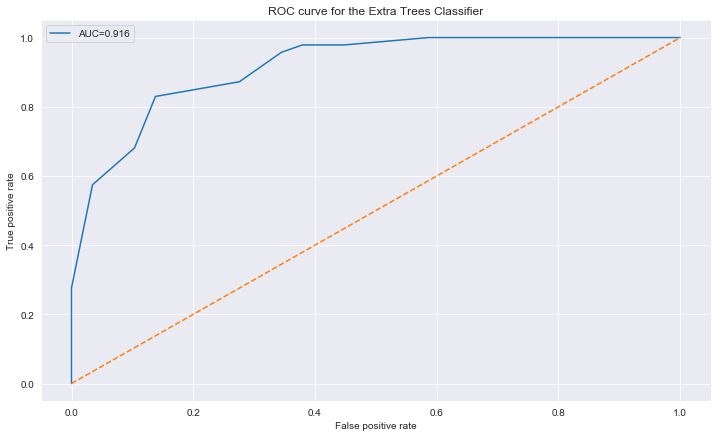

In [12]:
#Courbe ROC
plt.figure(figsize=(12,7))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.plot(false_positive_rate_ETC,true_positive_rate_ETC,label='AUC=0.916')
plt.legend()
plt.title('ROC curve for the Extra Trees Classifier')
plt.plot([0, 1], [0, 1],linestyle='--')
set_style('darkgrid')
plt.show()

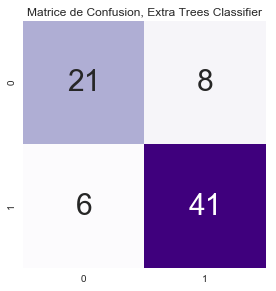

In [29]:
#Matrice de Confusion
ETC_CM = confusion_matrix(Y_test, Y_pred_ETC)

plt.figure(figsize=(20,10))

plt.subplot(2,4,2)
plt.title("Matrice de Confusion, Extra Trees Classifier")
heatmap(ETC_CM,annot=True,cmap="Purples",cbar=False, annot_kws={"size": 30})

In [30]:
#Validation Croisée
cross_score_ETC=cross_val_score(ETC, X, health_data.target, cv=15)
print(cross_score_ETC)
print('Moyenne de score à la validation croisée :', round(cross_score_ETC.mean(),3))

[0.76190476 0.80952381 0.80952381 0.7        0.9        0.85
 0.7        0.8        0.85       0.75       0.8        0.8
 0.65       0.8        0.85      ]
Moyenne de score à la validation croisée : 0.789


## Deuxième Approche : Utilisation du Classifieur Extremely Randomized Trees en sélectionnant les hyperparamètres (avec hyperopt) de manière à améliorer le score de validation croisée et donc à éviter l'overfitting

In [168]:
#Ici, définition de la fonction à optimiser (selon les hyperparamètres)
def ETC_cross_score(hyperparameters):
    ETC = ExtraTreesClassifier(**hyperparameters)
    ETC.fit(X_train, Y_train)
    a=cross_val_score(ETC, X, health_data.target, cv=15)
    b=-a.mean()
    print(-b,hyperparameters)
    return b

In [220]:
#L'espace d'optimisation 
hyper_param_space_ETC = {'n_estimators': hp.choice('n_estimators', range(50, 800)),
            'max_depth':  hp.choice('max_depth', range(2, 10))}

In [170]:
#optimisation, 
#dans l'affichage des résultats : en haut ce qui est approxime -max(f) et en bas le point les absisses correspondants 
optimal_hyp_param_ETC = fmin(ETC_cross_score, space=hyper_param_space_ETC, algo=tpe.suggest, max_evals=15)

-0.8130158730158729                                 
{'max_depth': 4, 'n_estimators': 419}               
-0.8263888888888888                                                           
{'max_depth': 4, 'n_estimators': 580}                                         
-0.8040873015873015                                                           
{'max_depth': 2, 'n_estimators': 331}                                         
-0.821626984126984                                                            
{'max_depth': 5, 'n_estimators': 292}                                         
-0.8222222222222223                                                           
{'max_depth': 8, 'n_estimators': 368}                                         
-0.821626984126984                                                            
{'max_depth': 6, 'n_estimators': 624}                                         
-0.8174603174603173                                                           
{'max_depth': 8, 'n_estim

Comme le max(f)=-min(-f), dans cette séquence les hyperparamètres optimaux sont {'max_depth': 4, 'n_estimators': 580} and la score de validation croisée optimal is 0.826.                                                   

# Regression Logistique

In [419]:
#Entrainement du modèle
LR=LogisticRegression()
LR.fit(X_train, Y_train)

LR_Score_train = round(LR.score(X_train, Y_train) * 100, 3)
LR_Score_test = round(LR.score(X_test, Y_test) * 100, 3)
print("La précision de cette Régression logistique pour le set d'apprentissage est ",LR_Score_train,"% et pour le set de test est ",LR_Score_test,"%.")

La précision de cette Régression logistique pour le set d'apprentissage est  84.581 % et pour le set de test est  86.842 %.


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [420]:
#Préparation courbe ROC
Y_pred_LR=LR.predict(X_test)
Y_pred_proba_LR = LR.predict_proba(X_test)
false_positive_rate_LR, true_positive_rate_LR, thresholds_LR = roc_curve(Y_test,Y_pred_proba_LR[:,1])
print(round(auc(false_positive_rate_LR, true_positive_rate_LR),3))

0.931


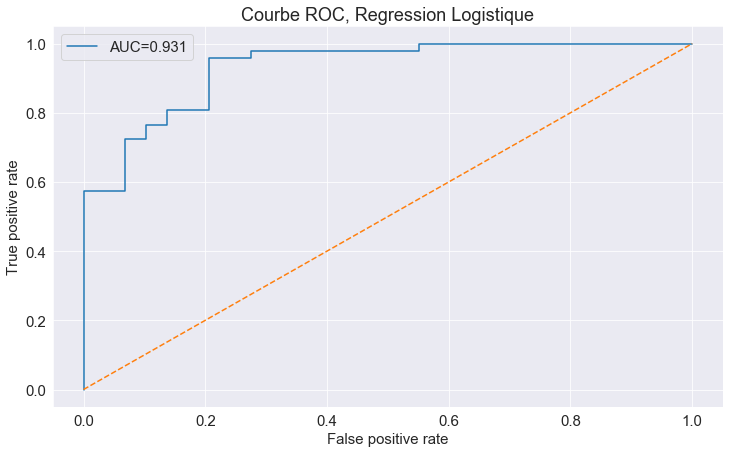

In [421]:
#Courbe ROC
plt.figure(figsize=(12,7))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.plot(false_positive_rate_LR,true_positive_rate_LR,label='AUC=0.931')
plt.legend()
plt.title('Courbe ROC, Regression Logistique')
plt.plot([0, 1], [0, 1],linestyle='--')
set_style('darkgrid')
plt.show()

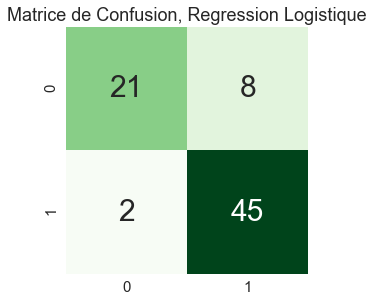

In [423]:
#Matrice de Confusion
LR_CM = confusion_matrix(Y_test, Y_pred_LR)

plt.figure(figsize=(20,10))

plt.subplot(2,4,2)
plt.title("Matrice de Confusion, Regression Logistique")
heatmap(LR_CM,annot=True,cmap="Greens",cbar=False, annot_kws={"size": 30})

In [247]:
#Validation croisée
cross_score_LR=cross_val_score(LR, X, health_data.target, cv=15)
print(round(cross_score_LR.mean(),3))

0.825


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

# Réduction des coûts par réduction du nombre de variables explicatives

In [362]:
#Definition des variables explicatives et de la variable d'intérêt
X=health_data.drop('target',1)
#Etablissement du set d'apprentissage et du set de test
X_train, X_test, Y_train, Y_test = train_test_split(X, health_data.target, test_size=0.25, random_state=3) 

## Réduction du nombre de variables explicatives dans le cadre du Regression Logistique par le biais de la pénalisation L1

In [425]:
#On veut voir les variables explicatives
G= X.columns.values
G

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [428]:
#Entrainement de la Régression logistique pénalisée par la norme L1
LR_L1= LogisticRegression(penalty='l1', solver='saga',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True)
LR_L1.fit(X_train, Y_train)
LR_L1_Score_train = round(LR_L1.score(X_train, Y_train) * 100, 3)
LR_L1_Score_test = round(LR_L1.score(X_test, Y_test) * 100, 3)
print("La précision de Regression Logistique pour le set d'apprentissage est ",LR_L1_Score_train,"% et pour le set de test est ",LR_L1_Score_test,"%.")

La précision de Regression Logistique pour le set d'apprentissage est  85.022 % et pour le set de test est  86.842 %.


In [429]:
#Coefficiants devant les variables explicatives
LR.coef_

array([[ 0.0031712 , -1.11569885,  0.81881938, -0.01376574, -0.00142855,
         0.25564703,  0.33220816,  0.02726451, -0.50971379, -0.59577856,
         0.47152308, -0.61233271, -0.87209111]])

## Réduction du nombre de variables explicatives par du Sparse ACP (avec toujours une pénalisation L1) dans le cadre de l'Extra Trees Classifier / Création de 5 nouvelles variables explicatives dans la base de données

In [430]:
# Sparse ACP utilisé que pour réduire le nombre de variables explicatives
# Cette fonction applique le Sparse ACP avec une pénalisation L1 controlée par le paramètre alpha
# Comme le Sparse ACP avec la pénalisation L1 annule des coefficiants des variables explicatives d'origines 
# ne seront plus prises en compte (on pourra voir lesquels grâce au print)
def new_df(a0,a1,a2,a3,a4,i):
    Sparse_ACP=SparsePCA(n_components=5, alpha=i) 
    Sparse_ACP.fit(X)
    print(Sparse_ACP.components_)
    b0=0
    for j in range (13) :
        b0=b0+a0[j]*X.iloc[:,j]
    b1=0
    for j in range (13) :
        b1=b1+a1[j]*X.iloc[:,j]
    b2=0
    for j in range (13) :
        b2=b2+a2[j]*X.iloc[:,j]
    b3=0
    for j in range (13) :
        b3=b3+a3[j]*X.iloc[:,j]
    b4=0
    for j in range (13) :
        b4=b4+a4[j]*X.iloc[:,j]


    data = {'b0':b0, 'b1':b1,'b2':b2,'b3':b3,'b4':b4} 
  
    #Nouvelle sélection des variables explicatives maintenant utilisée pour cet Extra Trees Classifier
    df = pd.DataFrame(data, index =range(303)) 
    df_train,df_test, Y_train, Y_test = train_test_split(df, health_data.target, test_size=0.25, random_state=3) 
    ETC=ExtraTreesClassifier()
    ETC.fit(df_train, Y_train)
    ETC_Score_train = round(ETC.score(df_train, Y_train) * 100, 3)
    ETC_Score_test = round(ETC.score(df_test, Y_test) * 100, 3)
    print("La précision de cet Extra trees classifier pour le set d'apprentissage est",ETC_Score_train,"% et pour le set de test est ",ETC_Score_test,"%.")
  
    # print the data 
    return df

In [431]:
#On renforce la pénalisation de manière à retirer une variable explicative
new_df_1=new_df(Sparse_ACP.components_[0],Sparse_ACP.components_[1],Sparse_ACP.components_[2],Sparse_ACP.components_[3],Sparse_ACP.components_[4],6)


/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.37430022e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -5.73771717e+00]
 [ 0.00000000e+00 -2.27128232e+00 -1.14410125e+01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -3.14726229e+00 -2.62912447e+03
   0.00000000e+00  0.00000000e+00 -1.87046000e+01  0.00000000e+00
  -6.31808728e+00]
 [ 0.00000000e+00  3.50398810e+00  0.00000000e+00  2.30534376e+03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.34160311e+01]
 [ 9.53420132e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   8.96595197e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [432]:
#On renforce la pénalisation de manière à retirer 2 variables explicatives
new_df_1=new_df(Sparse_ACP.components_[0],Sparse_ACP.components_[1],Sparse_ACP.components_[2],Sparse_ACP.components_[3],Sparse_ACP.components_[4],7)

/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.37330022e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -5.43059513e+00]
 [ 0.00000000e+00 -1.76600766e+00 -1.04409709e+01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.14724856e+00 -2.62812447e+03
   0.00000000e+00  0.00000000e+00 -1.77045851e+01  0.00000000e+00
  -5.93354457e+00]
 [ 0.00000000e+00  2.99862681e+00  0.00000000e+00  2.30434376e+03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.34248622e+01]
 [ 9.52420132e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   8.62704879e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [433]:
#On renforce la pénalisation de manière à retirer 3 variables explicatives
new_df_1=new_df(Sparse_ACP.components_[0],Sparse_ACP.components_[1],Sparse_ACP.components_[2],Sparse_ACP.components_[3],Sparse_ACP.components_[4],9)

/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.37130022e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.81534021e+00]
 [ 0.00000000e+00 -7.55460437e-01 -8.44088757e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.47221081e-01 -2.62612447e+03
   0.00000000e+00  0.00000000e+00 -1.57045552e+01  0.00000000e+00
  -5.16523295e+00]
 [ 0.00000000e+00  1.98790249e+00  0.00000000e+00  2.30234376e+03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.34399567e+01]
 [ 9.50420129e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  4.33255389e+00
   7.95209474e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


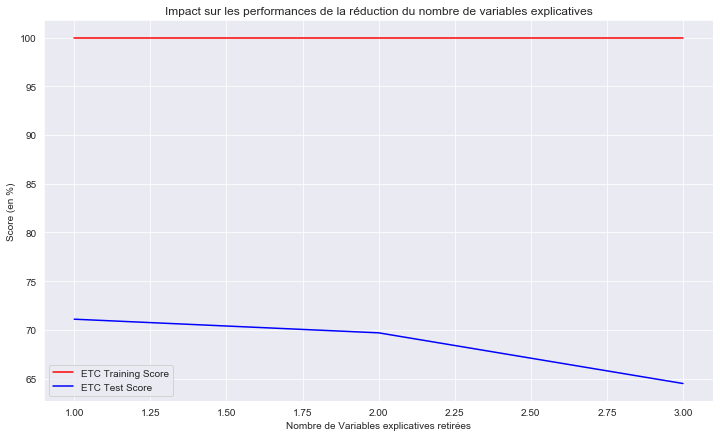

In [31]:
#On représente les résultats trouvés ci-dessus

t = [1,2,3]
a = [100,100,100]
b =[71.1,69.7,64.5]

plt.figure(figsize=(12,7))
plt.xlabel('Nombre de Variables explicatives retirées')
plt.ylabel('Score (en %)')
plt.plot(t, a, 'r',label='ETC Training Score')
plt.plot(t, b, 'b',label='ETC Test Score')
plt.title('Impact sur les performances de la réduction du nombre de variables explicatives')
plt.legend()



# Vitesse d'Apprentissage des deux algorithmes : 

## On agrandit au fur à mesure le set d'apprentissage pour tester la vitesse d'apprentissage des deux modèles 

In [435]:
#On augmente au fur à mesure le set d'apprentissage pour tester la vitesse d'apprentissage des deux modèles 
X_train, X_test, Y_train, Y_test = train_test_split(X, health_data.target, test_size=0.70, random_state=3) 
ETC=ExtraTreesClassifier()
ETC.fit(X_train, Y_train)
ETC_Score_train = round(ETC.score(X_train, Y_train) * 100, 3)
ETC_Score_test = round(ETC.score(X_test, Y_test) * 100, 3)
print("La précision pour cet Extra trees classifier pour le set d'apprentissage est ",ETC_Score_train,"% et pour le set de test est ",ETC_Score_test,"%.")

LR=LogisticRegression()
LR.fit(X_train, Y_train)
LR_Score_train = round(LR.score(X_train, Y_train) * 100, 3)
LR_Score_test = round(LR.score(X_test, Y_test) * 100, 3)
print("La précision pour cette  Regression logistique pour le set d'apprentissage est",LR_Score_train,"% et pour le set de test est",LR_Score_test,"%.")
    

La précision pour cet Extra trees classifier pour le set d'apprentissage est  100.0 % et pour le set de test est  76.526 %.
La précision pour cette  Regression logistique pour le set d'apprentissage est 84.444 % et pour le set de test est 79.812 %.


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [438]:
#On augmente au fur à mesure le set d'apprentissage pour tester la vitesse d'apprentissage des deux modèles
X_train, X_test, Y_train, Y_test = train_test_split(X, health_data.target, test_size=0.60, random_state=3) 
ETC=ExtraTreesClassifier()
ETC.fit(X_train, Y_train)
ETC_Score_train = round(ETC.score(X_train, Y_train) * 100, 3)
ETC_Score_test = round(ETC.score(X_test, Y_test) * 100, 3)
print("La précision pour cet Extra trees classifier pour le set d'apprentissage est",ETC_Score_train,"% et pour le set de test est",ETC_Score_test,"%.")

LR=LogisticRegression()
LR.fit(X_train, Y_train)
LR_Score_train = round(LR.score(X_train, Y_train) * 100, 3)
LR_Score_test = round(LR.score(X_test, Y_test) * 100, 3)
print("La précision pour cette  Regression logistique pour le set d'apprentissage est",LR_Score_train,"% et pour le set de test est",LR_Score_test,"%.")


La précision pour cet Extra trees classifier pour le set d'apprentissage est 100.0 % et pour le set de test est 79.121 %.
La précision pour cette  Regression logistique pour le set d'apprentissage est 81.818 % et pour le set de test est 80.769 %.


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [439]:
#On augmente au fur à mesure le set d'apprentissage pour tester la vitesse d'apprentissage des deux modèles
X_train, X_test, Y_train, Y_test = train_test_split(X, health_data.target, test_size=0.50, random_state=3) 
ETC=ExtraTreesClassifier()
ETC.fit(X_train, Y_train)
ETC_Score_train = round(ETC.score(X_train, Y_train) * 100, 3)
ETC_Score_test = round(ETC.score(X_test, Y_test) * 100, 3)
print("La précision pour cet Extra trees classifier pour le set d'apprentissage est",ETC_Score_train,"% et pour le set de test est",ETC_Score_test,"%.")

LR=LogisticRegression()
LR.fit(X_train, Y_train)
LR_Score_train = round(LR.score(X_train, Y_train) * 100, 3)
LR_Score_test = round(LR.score(X_test, Y_test) * 100, 3)
print("La précision pour cette  Regression logistique pour le set d'apprentissage est",LR_Score_train,"% et pour le set de test est",LR_Score_test,"%.")



La précision pour cet Extra trees classifier pour le set d'apprentissage est 100.0 % et pour le set de test est 80.921 %.
La précision pour cette  Regression logistique pour le set d'apprentissage est 82.781 % et pour le set de test est 84.868 %.


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [455]:
#On augmente au fur à mesure le set d'apprentissage pour tester la vitesse d'apprentissage des deux modèles
X_train, X_test, Y_train, Y_test = train_test_split(X, health_data.target, test_size=0.40, random_state=3) 
ETC=ExtraTreesClassifier()
ETC.fit(X_train, Y_train)
ETC_Score_train = round(ETC.score(X_train, Y_train) * 100, 3)
ETC_Score_test = round(ETC.score(X_test, Y_test) * 100, 3)
print("La précision pour cet Extra trees classifier pour le set d'apprentissage est",ETC_Score_train,"% et pour le set de test est",ETC_Score_test,"%.")

LR=LogisticRegression()
LR.fit(X_train, Y_train)
LR_Score_train = round(LR.score(X_train, Y_train) * 100, 3)
LR_Score_test = round(LR.score(X_test, Y_test) * 100, 3)
print("La précision pour cette  Regression logistique pour le set d'apprentissage est",LR_Score_train,"% et pour le set de test est",LR_Score_test,"%.")



La précision pour cet Extra trees classifier pour le set d'apprentissage est 100.0 % et pour le set de test est 83.607 %.
La précision pour cette  Regression logistique pour le set d'apprentissage est 82.873 % et pour le set de test est 88.525 %.


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [457]:
#On augmente au fur à mesure le set d'apprentissage pour tester la vitesse d'apprentissage des deux modèles
X_train, X_test, Y_train, Y_test = train_test_split(X, health_data.target, test_size=0.30, random_state=3) 
ETC=ExtraTreesClassifier()
ETC.fit(X_train, Y_train)
ETC_Score_train = round(ETC.score(X_train, Y_train) * 100, 3)
ETC_Score_test = round(ETC.score(X_test, Y_test) * 100, 3)
print("La précision pour cet Extra trees classifier pour le set d'apprentissage est",ETC_Score_train,"% et pour le set de test est",ETC_Score_test,"%.")

LR=LogisticRegression()
LR.fit(X_train, Y_train)
LR_Score_train = round(LR.score(X_train, Y_train) * 100, 3)
LR_Score_test = round(LR.score(X_test, Y_test) * 100, 3)
print("La précision pour cette  Regression logistique pour le set d'apprentissage est",LR_Score_train,"% et pour le set de test est",LR_Score_test,"%.")

La précision pour cet Extra trees classifier pour le set d'apprentissage est 100.0 % et pour le set de test est 82.418 %.
La précision pour cette  Regression logistique pour le set d'apprentissage est 84.906 % et pour le set de test est 86.813 %.


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


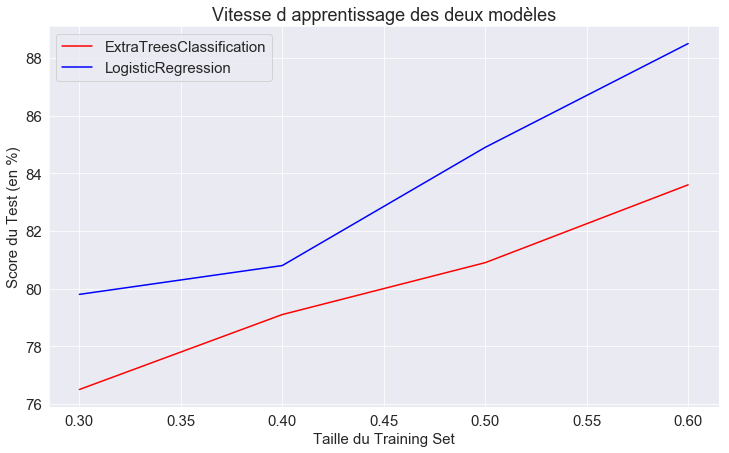

In [460]:
#On représente les résultats précédents sur la vitesse d'apprentissage des deux modèles
t = [0.30, 0.40, 0.50, 0.60]
a = [76.5,79.1,80.9,83.6]
b =[79.8,80.8,84.9,88.5]

plt.figure(figsize=(12,7))
plt.xlabel('Taille du Training Set')
plt.ylabel('Score du Test (en %)')
plt.plot(t, a, 'r',label='ExtraTreesClassification')
plt.plot(t, b, 'b',label='LogisticRegression')
plt.title('Vitesse d apprentissage des deux modèles')
plt.legend()
